<a id='imbal'></a>
### Imbalanced Class Handling

In [2]:
 !pip install -U imbalanced-learn

In [1]:
from imblearn.datasets import make_imbalance
from sklearn.datasets import load_iris

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
X, y = data.data, data.target
X, y = make_imbalance(X, y, sampling_strategy={0: 10, 1: 20, 2: 30}, random_state=42)

Data shape: (60,)


<Axes: >

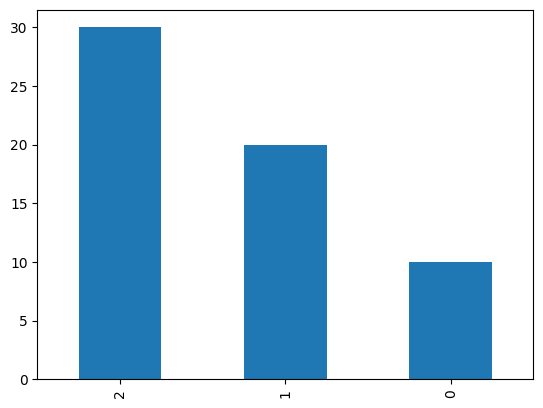

In [6]:
import pandas as pd

print("Data shape:", y.shape)
pd.Series(y).value_counts().plot.bar()

#### Oversampling: SMOTE

Data shape: (90,)


<Axes: >

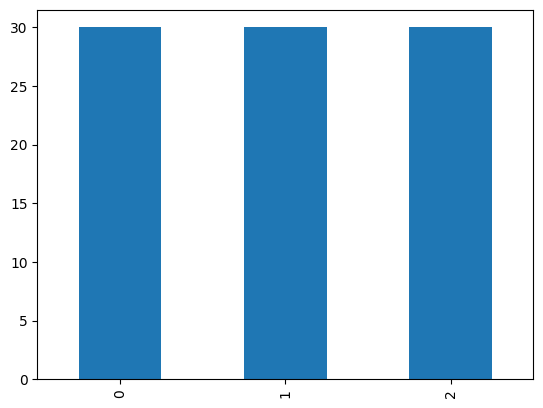

In [7]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_smt, y_smt = sm.fit_resample(X, y)

print("Data shape:", y_smt.shape)
pd.Series(y_smt).value_counts().plot.bar()

#### Undersampling

Data shape: (30,)


<Axes: >

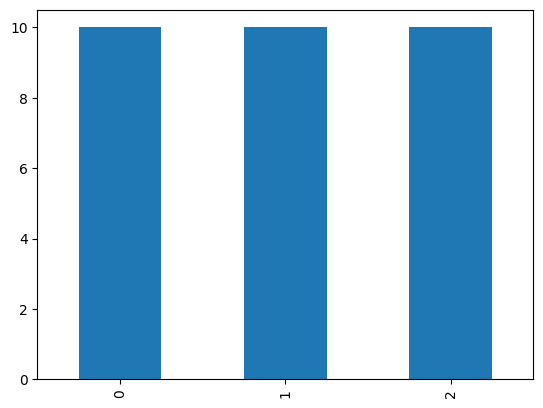

In [8]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("Data shape:", y_rus.shape)
pd.Series(y_rus).value_counts().plot.bar()

### Data Transformation

Data Transformation is performed to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

There are 3 popular methods to transform data:
* Scaling
* Normalization
* Standardization

### Scaling

In scaling, you transform the data such that the features are within a specific range e.g. [0, 1].

${\displaystyle x'={\frac {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}$

where ${\displaystyle x}$ is an original value, ${\displaystyle x'}$ is the rescaled value. 

Scaling is important in the algorthms such as support vector machines (SVM) and k-nearest neighbors
(KNN) where distance betYouen the data points is important. For example, in the dataset containing
prices of products; without scaling, SVM might treat 1 USD equivalent to 1 INR though 1 USD = 65
INR.

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# set seed for reproducibility
np.random.seed(10)

# generate 1000 data points randomly drawn from an exponential distr
original_data = np.random.exponential(size = 1000)

In [11]:
original_data

array([1.47543445e+00, 2.09702971e-02, 1.00416130e+00, 1.38152130e+00,
       6.90165654e-01, 2.54629891e-01, 2.20725059e-01, 1.42933011e+00,
       1.85258870e-01, 9.24879616e-02, 1.15632557e+00, 3.06601196e+00,
       3.95608131e-03, 7.17833933e-01, 1.67462177e+00, 9.48106702e-01,
       1.27925440e+00, 3.45136156e-01, 2.49828522e+00, 1.25377873e+00,
       7.82075378e-01, 1.53349390e-01, 4.67352363e-01, 1.12126784e+00,
       5.83097391e-01, 5.69185924e-01, 9.61724852e-01, 7.19775062e-01,
       1.05095757e+00, 9.18891494e-01, 1.63590098e+00, 7.37406644e-01,
       2.39304474e+00, 3.84539713e-01, 9.48155863e-02, 3.57675525e-01,
       1.21020678e-01, 1.76422987e+00, 4.80315873e-02, 9.84267553e-01,
       7.93157934e-01, 1.71084512e+00, 2.21828841e-01, 1.94386436e+00,
       4.33328676e-01, 1.40506011e+00, 3.50922531e-01, 2.15361765e+00,
       3.93800857e-01, 1.80342593e-01, 4.98451243e-01, 9.81205372e-02,
       1.72095991e+00, 1.63875166e-01, 4.84694126e-01, 2.88707003e+00,
      

In [12]:
# mix-max scale the data betYouen 0 and 1
scaled_data = minmax_scale(original_data)

In [13]:
scaled_data

array([2.23356358e-01, 2.91141485e-03, 1.51928141e-01, 2.09122472e-01,
       1.04337588e-01, 3.83258842e-02, 3.31871197e-02, 2.16368583e-01,
       2.78117091e-02, 1.37509447e-02, 1.74990823e-01, 4.64431239e-01,
       3.32665940e-04, 1.08531113e-01, 2.53546060e-01, 1.43432261e-01,
       1.93622453e-01, 5.20434093e-02, 3.78384092e-01, 1.89761249e-01,
       1.18267828e-01, 2.29753688e-02, 7.05670319e-02, 1.69677320e-01,
       8.81098542e-02, 8.60013715e-02, 1.45496287e-01, 1.08825319e-01,
       1.59020789e-01, 1.39004276e-01, 2.47677367e-01, 1.11497639e-01,
       3.62433386e-01, 5.80155846e-02, 1.41037297e-02, 5.39439309e-02,
       1.80754879e-02, 2.67127455e-01, 7.01294228e-03, 1.48912957e-01,
       1.19947548e-01, 2.59036229e-01, 3.33544136e-02, 2.94353644e-01,
       6.54102531e-02, 2.12690116e-01, 5.29204176e-02, 3.26144769e-01,
       5.94192442e-02, 2.70665767e-02, 7.52805140e-02, 1.46046425e-02,
       2.60569272e-01, 2.45707014e-02, 7.31954253e-02, 4.37310019e-01,
      

C:\Users\USER\AppData\Local\Temp\ipykernel_7008\1905820371.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\1905820371.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


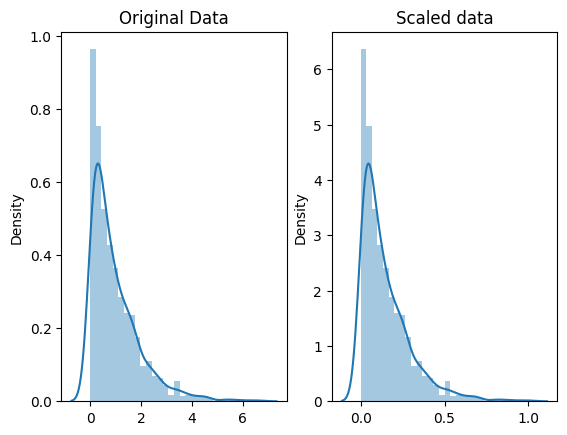

In [16]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

### Normalization
The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution (Gaussian distribution), also known as the bell curve, is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean.

The general formula is given as:

${\displaystyle x'={\frac {x-{\text{mean}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}$

where ${\displaystyle x}$ is an original value, ${\displaystyle x'}$ is the normalized value. 

In [17]:
# for Box-Cox Transformation
from scipy import stats

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

In [18]:
normalized_data

(array([ 0.410208  , -2.39448986,  0.00415501,  0.337772  , -0.3527864 ,
        -1.14286539, -1.23958206,  0.37508096, -1.35313971, -1.75394087,
         0.14814612,  1.30922805, -2.864856  , -0.31705045,  0.55337562,
        -0.05290501,  0.25468836, -0.92410541,  1.03930996,  0.23324203,
        -0.23779006, -1.46978664, -0.68733683,  0.11625514, -0.50180215,
        -0.52259483, -0.03882107, -0.31458126,  0.05003821, -0.08362436,
         0.52655625, -0.29237244,  0.98446149, -0.84189257, -1.74086478,
        -0.89723245, -1.60769338,  0.61375153, -2.06869016, -0.01582347,
        -0.22460114,  0.57805905, -1.23626854,  0.72835552, -0.7482075 ,
         0.35625679, -0.91161779,  0.85278944, -0.82346872, -1.37010328,
        -0.63446304, -1.72269437,  0.58488341, -1.42950171, -0.65754717,
         1.22840091,  1.82081661, -0.46350581,  0.60392044, -1.05270332,
        -0.09339185,  0.95146496, -0.25866245, -0.11243892, -2.14627594,
        -0.73256567, -1.81010535, -0.88288327, -0.8

C:\Users\USER\AppData\Local\Temp\ipykernel_7008\2944533330.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\2944533330.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax=ax[1])


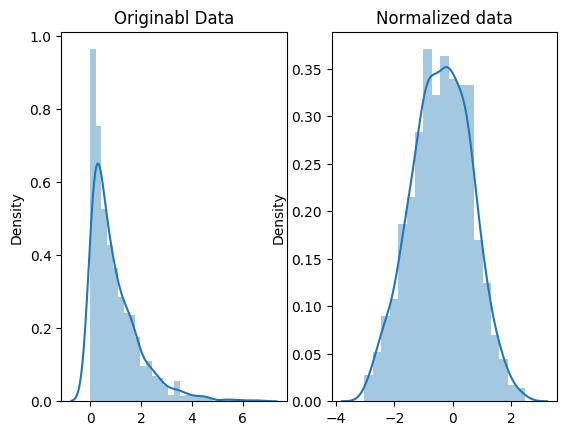

In [19]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Originabl Data")

sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In scaling, you’re changing the range of your data while in normalization you’re changing the shape of
the distribution of your data.

You need to normalize our data if you’re going use a machine learning or statistics technique that
assumes that data is normally distributed e.g. t-tests, ANOVAs, linear regression, linear discriminant
analysis (LDA) and Gaussian Naive Bayes.

### Standardization
Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

${\displaystyle x'={\frac {x-{\bar {x}}}{\sigma }}}$

Where $x$ is the original feature vector, ${\bar{x}={\text{average}}(x)}$ is the mean of that feature vector, and $\sigma$ is its standard deviation.

In [20]:
from sklearn.preprocessing import StandardScaler

standerdized_data = StandardScaler().fit_transform(original_data.reshape(1, -1))

C:\Users\USER\AppData\Local\Temp\ipykernel_7008\3112127886.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\3112127886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(standerdized_data, ax=ax[1])
c:\tareq\Data-scienc

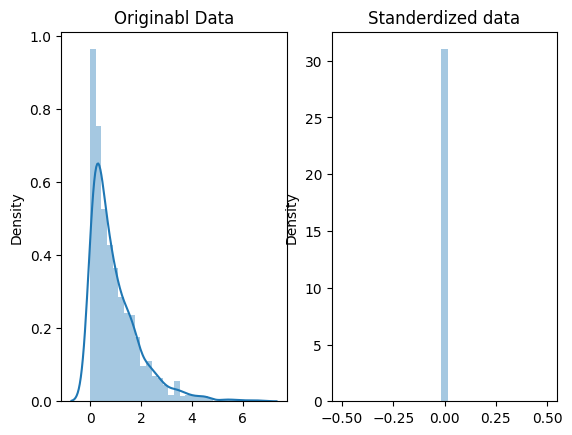

In [21]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Originabl Data")

sns.distplot(standerdized_data, ax=ax[1])
ax[1].set_title("Standerdized data")
plt.show()

#### Applications of Data Transformation
In stochastic gradient descent, feature scaling can sometimes improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors.

<a id='date'></a>
### Extracting Date
We can perform the following engineering to the date time variales:
* Extracting the parts of the date into different columns: Year, month, day, etc.
* Extracting the time period between the current date and columns in terms of years, months, days, etc.
* Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

In [23]:
from datetime import date

data = pd.DataFrame({'date':['01-01-2017', 
                             '04-12-2008', 
                             '23-06-1988', 
                             '25-08-1999', 
                             '20-02-1993',]})
data

date
0  01-01-2017
1  04-12-2008
2  23-06-1988
3  25-08-1999
4  20-02-1993

In [24]:
#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

data

date
0 2017-01-01
1 2008-12-04
2 1988-06-23
3 1999-08-25
4 1993-02-20

In [25]:
#Extracting Year
data['year'] = data['date'].dt.year

data

date  year
0 2017-01-01  2017
1 2008-12-04  2008
2 1988-06-23  1988
3 1999-08-25  1999
4 1993-02-20  1993

In [26]:
#Extracting Month
data['month'] = data['date'].dt.month

data

date  year  month
0 2017-01-01  2017      1
1 2008-12-04  2008     12
2 1988-06-23  1988      6
3 1999-08-25  1999      8
4 1993-02-20  1993      2

In [27]:
#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

data

date  year  month  passed_years
0 2017-01-01  2017      1             8
1 2008-12-04  2008     12            17
2 1988-06-23  1988      6            37
3 1999-08-25  1999      8            26
4 1993-02-20  1993      2            32

In [28]:
#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

data

date  year  month  passed_years  passed_months
0 2017-01-01  2017      1             8            105
1 2008-12-04  2008     12            17            202
2 1988-06-23  1988      6            37            448
3 1999-08-25  1999      8            26            314
4 1993-02-20  1993      2            32            392

In [29]:
#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

data

date  year  month  passed_years  passed_months   day_name
0 2017-01-01  2017      1             8            105     Sunday
1 2008-12-04  2008     12            17            202   Thursday
2 1988-06-23  1988      6            37            448   Thursday
3 1999-08-25  1999      8            26            314  Wednesday
4 1993-02-20  1993      2            32            392   Saturday